# Classifying an email / SMS as spam or non-spam (a.k.a. ham)

<b>Installing Dependiciesry<b>

In [1]:
# Importing the libraries for Data analysis and wrangling
import pandas as pd
import numpy as np

# Importing the libraries for Data visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

In [2]:
# Current working directory
import os 
print(os.getcwd())

C:\Users\ukumar8\Documents\2.BITS\Sem-2\3.Machine Learning\Assignment\Assignmant1\uploaded_git


## 1. Import the dataset from https://www.kaggle.com/uciml/sms-spam-collection-dataset.

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<b>Removing unwanted columns and Renaming column v1,v2.<b>

In [4]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [5]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# counting spam and ham instances

data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
ham_spam = data.label.value_counts()

In [8]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [9]:
# mapping labels to 0 and 1
data['label'] = data.label.map({'ham':0, 'spam':1})

In [10]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
X = data.text
y = data.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


## 2. Split the data into training and testing.

In [12]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=12) 

In [13]:
X_train.head()

1300    Those cocksuckers. If it makes you feel better...
1465    YOU 07801543489 are guaranteed the latests Nok...
5293               I donno its in your genes or something
2162    1) Go to write msg 2) Put on Dictionary mode 3...
2742    No * am working on the ringing u thing but hav...
Name: text, dtype: object

## 3. Extract features using TF-IDF and display the features.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

# tokenize and build vocab
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [15]:
# summarize
# print(vectorizer.vocabulary_)
# print(vectorizer.idf_)

In [16]:
# display the features
# vectorizer.get_feature_names()

In [17]:
# transform
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed =vectorizer.transform(X_test)


In [18]:
X_train_transformed.shape

(4736, 7685)

In [19]:
X_test_transformed.shape

(836, 7685)

## 4. Model the classifier using GaussianNB, BernoulliNB and MultinomialNB.
## 5. Train the classifiers.
## 6. Evaluate classifiers on Test Data.

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc

### GaussianNB Model

In [21]:
# training the NB model and making predictions
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit
gnb.fit(X_train_transformed.toarray(),y_train)

# predict class
y_pred_class_gnb = gnb.predict(X_test_transformed.toarray())

# predict probabilities
y_pred_proba_gnb =gnb.predict_proba(X_test_transformed.toarray())


# printing the overall accuracy
acc_score_gnb = round(metrics.accuracy_score(y_test, y_pred_class_gnb) * 100, 2)
print(acc_score_gnb, "%")

89.0 %


In [22]:
# y_pred_class_gnb

In [23]:
# note that alpha=1 is used by default for smoothing
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
# confusion matrix
confusion_gnb = metrics.confusion_matrix(y_test, y_pred_class_gnb)
print(confusion_gnb)

TN_gnb = confusion_gnb[0, 0]
FP_gnb = confusion_gnb[0, 1]
FN_gnb = confusion_gnb[1, 0]
TP_gnb = confusion_gnb[1, 1]

[[647  77]
 [ 15  97]]


In [25]:
sensitivity_gnb = TP_gnb / float(FN_gnb + TP_gnb)
print("sensitivity",sensitivity_gnb)

sensitivity 0.8660714285714286


In [26]:
specificity_gnb = TN_gnb / float(TN_gnb + FP_gnb)

print("specificity",specificity_gnb)

specificity 0.893646408839779


In [27]:
precision_gnb = TP_gnb / float(TP_gnb + FP_gnb)

print("precision",precision_gnb)
print(metrics.precision_score(y_test, y_pred_class_gnb))

precision 0.5574712643678161
0.5574712643678161


In [28]:
#False Positive Rate : 
False_Positive_Rate_gnb = FP_gnb / float(TN_gnb+FP_gnb)
print("False Positive Rate",False_Positive_Rate_gnb)

False Positive Rate 0.106353591160221


In [29]:
print("precision",precision_gnb)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class_gnb))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class_gnb))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class_gnb))

precision 0.5574712643678161
PRECISION SCORE : 0.5574712643678161
RECALL SCORE : 0.8660714285714286
F1 SCORE : 0.6783216783216783


In [30]:
# y_pred_class_gnb

In [31]:
y_pred_proba_gnb

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [32]:
# creating an ROC curve
false_positive_rate_gnb, true_positive_rate_gnb, thresholds_gnb = roc_curve(y_test, y_pred_proba_gnb[:,1])
roc_auc_gnb = auc(false_positive_rate_gnb, true_positive_rate_gnb)

In [33]:
# area under the curve
print (roc_auc_gnb)

0.8798589187056037


In [34]:
print(true_positive_rate_gnb)

[0.         0.86607143 1.        ]


In [35]:
print(false_positive_rate_gnb)

[0.         0.10635359 1.        ]


In [36]:
print(thresholds_gnb)

[2. 1. 0.]


In [37]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds_gnb, 
              'TPR': true_positive_rate_gnb, 
              'FPR':false_positive_rate_gnb
             })

,Threshold,TPR,FPR
0,2.0,0.000000,0.000000
1,1.0,0.866071,0.106354
2,0.0,1.000000,1.000000


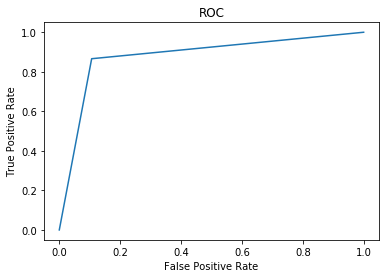

In [38]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_gnb, true_positive_rate_gnb)

### BernoulliNB Model

In [39]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class_bnb = bnb.predict(X_test_transformed)

# predict probability
y_pred_proba_bnb =bnb.predict_proba(X_test_transformed)

# accuracy
 
acc_score_bnb = round(metrics.accuracy_score(y_test, y_pred_class_bnb) * 100, 2)
print(acc_score_bnb, "%")

96.53 %


In [40]:
# y_pred_class_bnb

In [41]:
# note that alpha=1 is used by default for smoothing
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [42]:
confusion_bnb = metrics.confusion_matrix(y_test, y_pred_class_bnb)
print(confusion_bnb)

TN_bnb = confusion_bnb[0, 0]
FP_bnb = confusion_bnb[0, 1]
FN_bnb = confusion_bnb[1, 0]
TP_bnb = confusion_bnb[1, 1]

[[724   0]
 [ 29  83]]


In [43]:
sensitivity_bnb = TP_bnb / float(FN_bnb + TP_bnb)
print("sensitivity",sensitivity_bnb)

sensitivity 0.7410714285714286


In [44]:
specificity_bnb = TN_bnb / float(TN_bnb + FP_bnb)

print("specificity",specificity_bnb)

specificity 1.0


In [45]:
precision_bnb = TP_bnb / float(TP_bnb + FP_bnb)

print("precision",precision_bnb)
print(metrics.precision_score(y_test, y_pred_class_bnb))

precision 1.0
1.0


In [46]:
#False Positive Rate : 
False_Positive_Rate_bnb = FP_bnb / float(TN_bnb+FP_bnb)
print("False Positive Rate",False_Positive_Rate_bnb)

False Positive Rate 0.0


In [47]:
print("precision",precision_bnb)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class_bnb))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class_bnb))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class_bnb))

precision 1.0
PRECISION SCORE : 1.0
RECALL SCORE : 0.7410714285714286
F1 SCORE : 0.8512820512820513


In [48]:
y_pred_proba_bnb

array([[1.00000000e+00, 3.79261771e-12],
       [9.99999984e-01, 1.59384386e-08],
       [9.99999999e-01, 8.86438522e-10],
       ...,
       [1.00000000e+00, 1.26602667e-11],
       [9.99999997e-01, 2.59226170e-09],
       [1.00000000e+00, 3.29961092e-10]])

In [49]:
# accurcy
false_positive_rate_bnb, true_positive_rate_bnb, thresholds_bnb = roc_curve(y_test, y_pred_proba_bnb[:,1])
roc_auc_bnb = auc(false_positive_rate_bnb, true_positive_rate_bnb)

In [50]:
# area under the curve
print (roc_auc_bnb)

0.9975582083662194


In [51]:
# print(true_positive_rate_bnb)

In [52]:
# print(false_positive_rate_bnb)

In [53]:
# print(thresholds_bnb)

In [59]:
# matrix of thresholds, tpr, fpr
#pd.DataFrame({'Threshold': thresholds_bnb, 
#              'TPR': true_positive_rate_bnb, 
#              'FPR':false_positive_rate_bnb
#             })

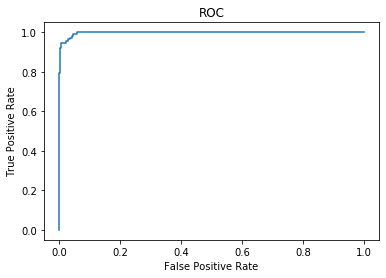

In [60]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_bnb, true_positive_rate_bnb)

### MultinomialNB Model

In [61]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class_mnb = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba_mnb =mnb.predict_proba(X_test_transformed)


# printing the overall accuracy
acc_score_mnb = round(metrics.accuracy_score(y_test, y_pred_class_mnb) * 100, 2)
print(acc_score_mnb, "%")

96.29 %


In [62]:
# y_pred_class_mnb

In [63]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
# confusion matrix
confusion_mnb = metrics.confusion_matrix(y_test, y_pred_class_mnb)
print(confusion_mnb)

TN_mnb = confusion_mnb[0, 0]
FP_mnb = confusion_mnb[0, 1]
FN_mnb = confusion_mnb[1, 0]
TP_mnb = confusion_mnb[1, 1]

[[722   2]
 [ 29  83]]


In [65]:
sensitivity_mnb = TP_mnb / float(FN_mnb + TP_mnb)
print("sensitivity",sensitivity_mnb)

sensitivity 0.7410714285714286


In [66]:
specificity_mnb = TN_mnb / float(TN_mnb + FP_mnb)

print("specificity",specificity_mnb)

specificity 0.9972375690607734


In [67]:
precision_mnb = TP_mnb / float(TP_mnb + FP_mnb)

print("precision",precision_mnb)
print(metrics.precision_score(y_test, y_pred_class_mnb))

precision 0.9764705882352941
0.9764705882352941


In [68]:
#False Positive Rate : 
False_Positive_Rate_mnb = FP_mnb / float(TN_mnb+FP_mnb)
print("False Positive Rate",False_Positive_Rate_mnb)

False Positive Rate 0.0027624309392265192


In [69]:
print("precision",precision_mnb)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class_mnb))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class_mnb))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class_mnb))

precision 0.9764705882352941
PRECISION SCORE : 0.9764705882352941
RECALL SCORE : 0.7410714285714286
F1 SCORE : 0.8426395939086295


In [70]:
y_pred_proba_mnb

array([[0.99691903, 0.00308097],
       [0.98584152, 0.01415848],
       [0.97289387, 0.02710613],
       ...,
       [0.99733064, 0.00266936],
       [0.97209755, 0.02790245],
       [0.9832448 , 0.0167552 ]])

In [71]:
# creating an ROC curve
false_positive_rate_mnb, true_positive_rate_mnb, thresholds_mnb = roc_curve(y_test, y_pred_proba_mnb[:,1])
roc_auc_mnb = auc(false_positive_rate_mnb, true_positive_rate_mnb)

In [72]:
# area under the curve
print (roc_auc_mnb)

0.9856698895027625


In [73]:
# print(true_positive_rate_mnb)

In [74]:
# print(false_positive_rate_mnb)

In [75]:
# print(thresholds_mnb)

In [76]:
# matrix of thresholds, tpr, fpr
#pd.DataFrame({'Threshold': thresholds_mnb, 
#              'TPR': true_positive_rate_mnb, 
#              'FPR':false_positive_rate_mnb
#             })

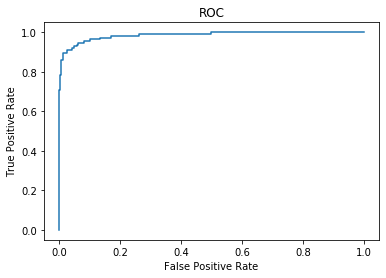

In [77]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_mnb, true_positive_rate_mnb)

## 7. Report the classifier accuracy, polarity score for each sentence for all the classifiers.

In [78]:
cls_acc = pd.DataFrame(list(zip(['GaussianNB','BernoulliNB','MultinomialNB'], 
                                [acc_score_gnb, acc_score_bnb ,acc_score_mnb],
                                [False_Positive_Rate_gnb, False_Positive_Rate_bnb, False_Positive_Rate_mnb],
                                [precision_gnb, precision_bnb, precision_mnb],
                                [sensitivity_gnb, sensitivity_bnb, sensitivity_mnb],
                                [specificity_gnb, specificity_bnb, specificity_mnb])),
                       columns =['Classifier Name', 'Accuracy Score %','False Positive Rate',
                                 'Precision','Sensitivity/Recall','Specificity']) 

cls_acc

,Classifier Name,Accuracy Score %,False Positive Rate,Precision,Sensitivity/Recall,Specificity
0,GaussianNB,89.00,0.106354,0.557471,0.866071,0.893646
1,BernoulliNB,96.53,0.000000,1.000000,0.741071,1.000000
2,MultinomialNB,96.29,0.002762,0.976471,0.741071,0.997238


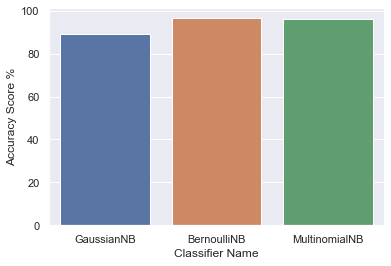

In [79]:
sns.set(style="darkgrid")
sns.barplot(x="Classifier Name", y="Accuracy Score %", data=cls_acc)

In [80]:
#confusion matrix for GaussianNB
confusion_gnb

array([[647,  77],
       [ 15,  97]], dtype=int64)

In [81]:
#confusion matrix for BernoulliNB
confusion_bnb

array([[724,   0],
       [ 29,  83]], dtype=int64)

In [82]:
#confusion matrix for MultinomialNB
confusion_mnb

array([[722,   2],
       [ 29,  83]], dtype=int64)

## 8. Display and visualize the word cloud of both the classes. For example, Display word clouds for Spam vs Legitimate word clouds. It should show the frequent words coming in respective classes.

In [83]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
def visualize(label):
  words = ''
  for msg in data[data['label'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1600, height=800).generate(words)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

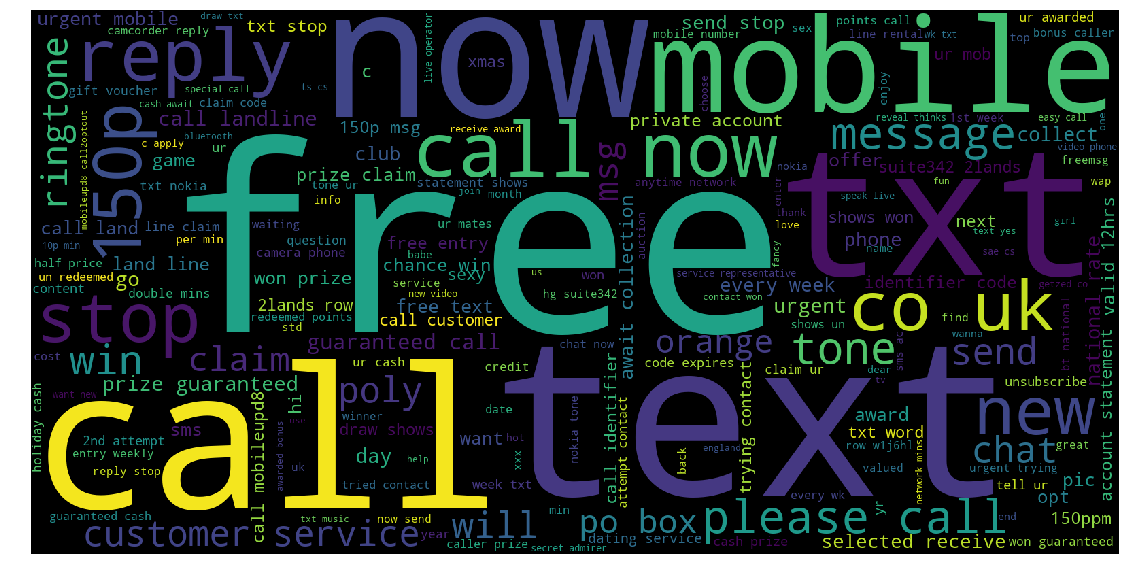

In [80]:
# for Spam
visualize(1)

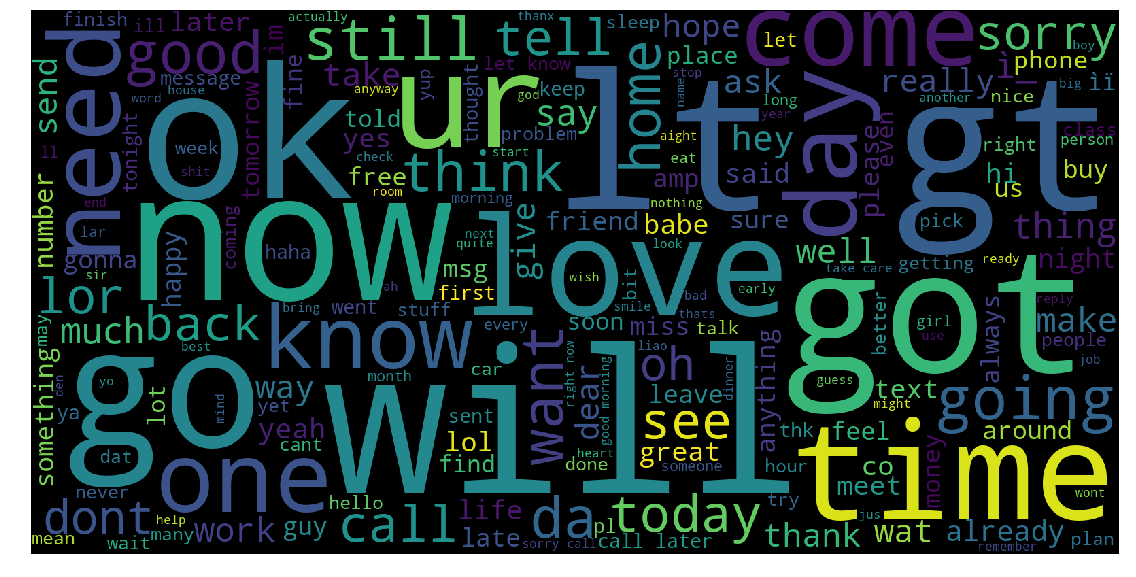

In [81]:
# for Spam
visualize(0)